In [2]:
!pip install darknet


  Using cached darknet-0.3-py3-none-any.whl (4.6 kB)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive/MyDrive/IOT_course

/content/drive/MyDrive/IOT_course


In [5]:
ls

coco.names  dog.jpeg  image.jpg  yolov3.cfg  yolov3.weights  yolov4.cfg  yolov4.weights


In [ ]:
]import os

# Check if files exist in the current directory
print("yolov3.cfg exists:", os.path.exists("yolov3.cfg"))
print("yolov3.weights exists:", os.path.exists("yolov3.weights"))
print("coco.names exists:", os.path.exists("coco.names"))  # If you have a class names file


yolov3.cfg exists: True
yolov3.weights exists: True
coco.names exists: True


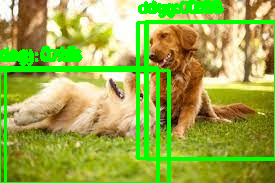

In [8]:
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv3 model in OpenCV (converted to a different format)
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")

# Load the COCO class names (optional)
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Read the input image
image = cv2.imread("dog.jpeg")

# Get the image dimensions
height, width = image.shape[:2]

# Preprocess the image and create a blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set the input to the network
net.setInput(blob)

# Perform inference
detections = net.forward()

# Loop over the detections
for detection in detections:
    scores = detection[5:]
    classId = scores.argmax()
    confidence = scores[classId]
    #print("Class ID:", classId)
    #print("Confidence:", confidence)


    if confidence > 0.1:  # You can adjust the confidence threshold
        center_x, center_y, w, h = (detection[:4] * [width, height, width, height]).astype(int)
        x, y = int(center_x - w/2), int(center_y - h/2)

        # Draw a bounding box and label on the image
        color = (0, 255, 0)  # BGR color for the bounding box (green in this case)
        cv2.rectangle(image, (x, y, x + w, y + h), color, 2)
        label = f"{classes[classId]}: {confidence:.2f}"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the annotated image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()